# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

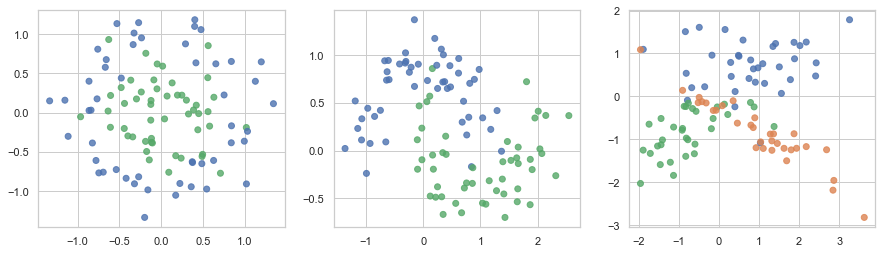

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

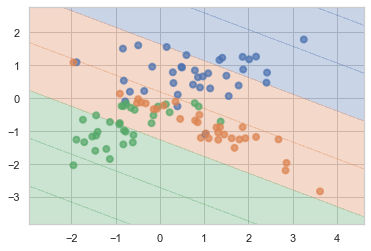

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
def plot_surface_mod(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

Accuracy на обучающей для 1 - го датасета = 1.0
Accuracy на тестовой 1 - го датасета = 0.75
Accuracy на обучающей для 2 - го датасета = 1.0
Accuracy на тестовой 2 - го датасета = 0.95
Accuracy на обучающей для 3 - го датасета = 1.0
Accuracy на тестовой 3 - го датасета = 0.7


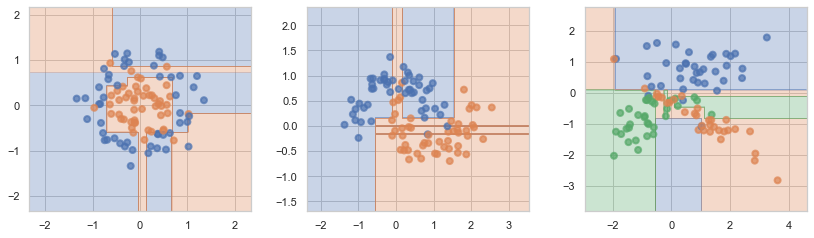

In [8]:
from sklearn import metrics
f, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    tree = DecisionTreeClassifier().fit(X_train, y_train)
    print('Accuracy на обучающей для %d - го датасета =' %(i+1), metrics.accuracy_score(tree.predict(X_train), y_train))
    print('Accuracy на тестовой %d - го датасета =' %(i+1), metrics.accuracy_score(tree.predict(X_test), y_test))
    plot_surface_mod(tree, X, y, axs[i])
f.subplots_adjust(left=0.08, right=0.98, hspace=0.4, wspace=0.25)

__Ответ:__ исходя из графиков и значений accuracy, можно сделать вывод, что да, скорее всего, имеет место довольно сильное переобучение

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [9]:
from sklearn.model_selection import GridSearchCV

max_depth_set = np.arange(1, 10, 2)
min_samples_leaf_set = np.arange(1, 10, 2)

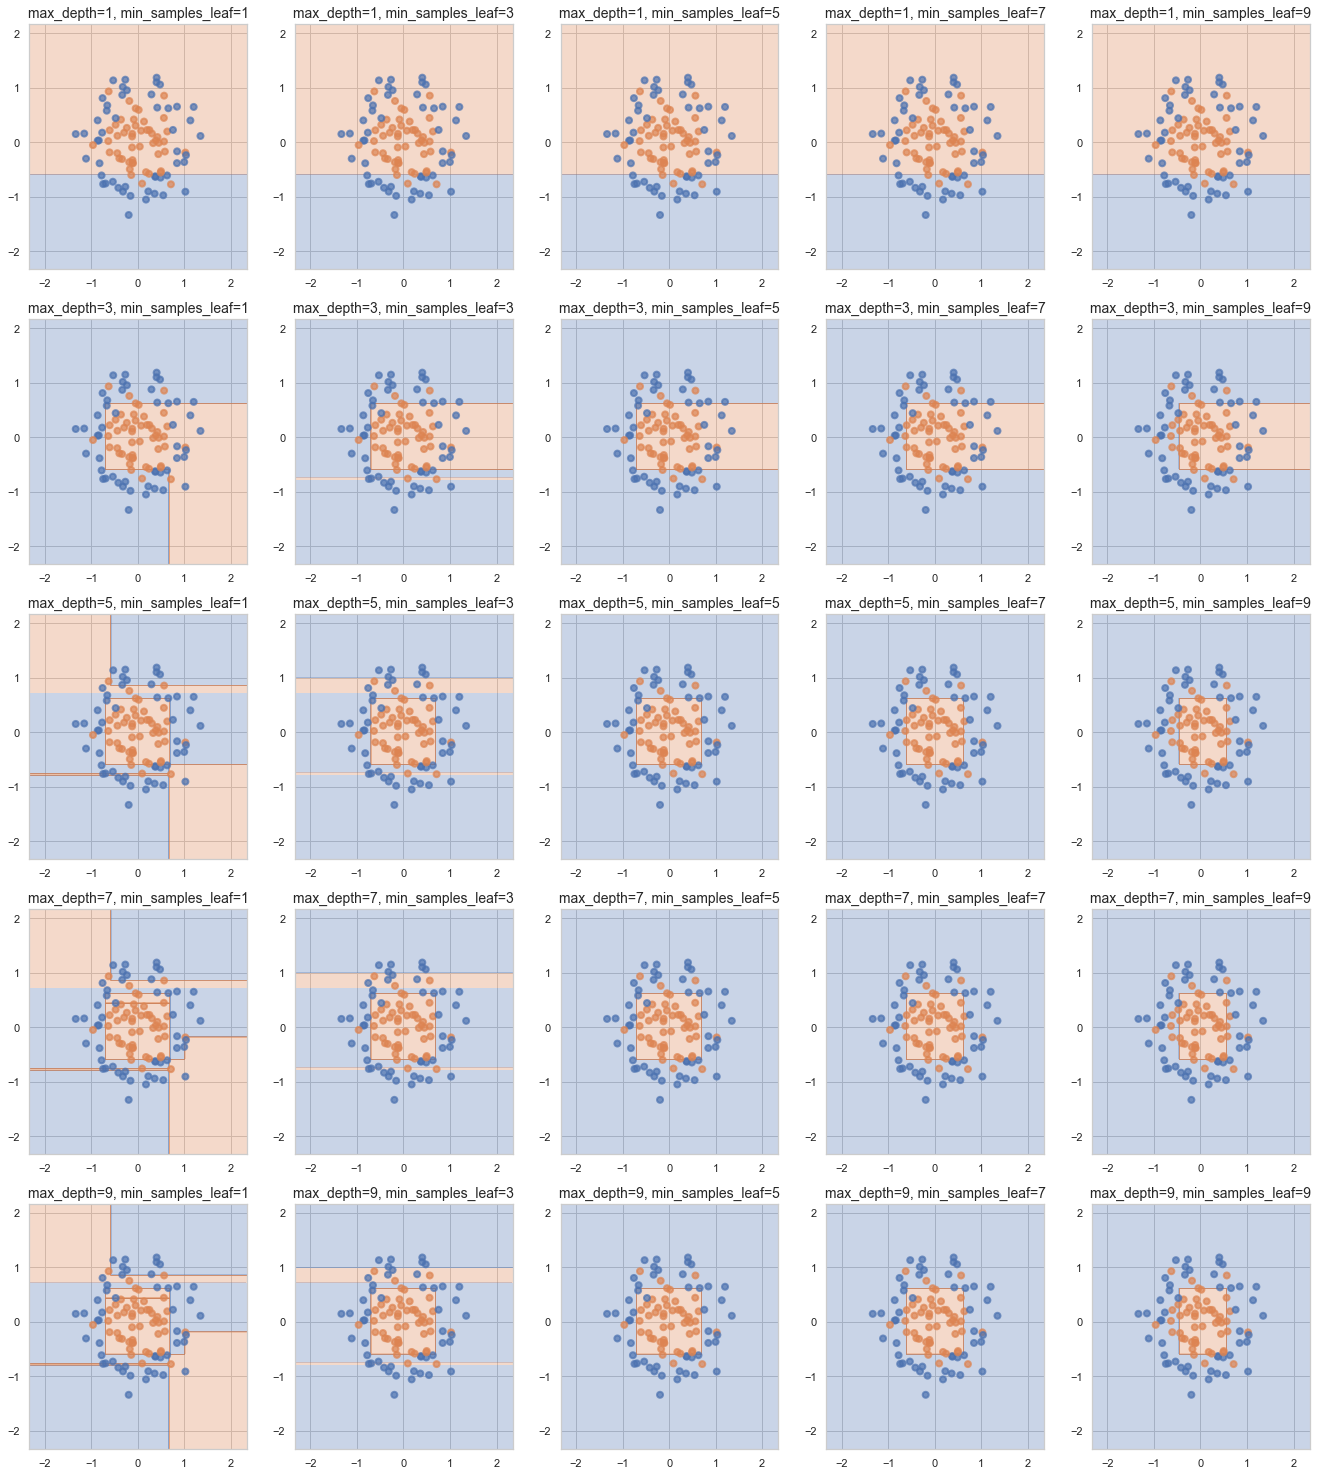

In [10]:
f, axs = plt.subplots(len(max_depth_set), len(min_samples_leaf_set), figsize=(18, 22))
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
table_df = pd.DataFrame(columns=['dataset', 'max_depth', 'min_samples_leaf', 'train_accur', 'test_accur'])
for i, md in enumerate(max_depth_set):
    for j, ms in enumerate(min_samples_leaf_set):        
        tree_cv = DecisionTreeClassifier(max_depth=md, min_samples_leaf=ms, random_state=42).fit(X_train, y_train)
        d = {'dataset':1, 'max_depth':md, 'min_samples_leaf':ms, 
             'train_accur':metrics.accuracy_score(tree_cv.predict(X_train), y_train), 
             'test_accur':metrics.accuracy_score(tree_cv.predict(X_valid), y_valid)}
        table_df = table_df.append(d, ignore_index=True)
        axs[i,j].set_title('max_depth=%d, min_samples_leaf=%d'%(md, ms), fontsize=14)
        plot_surface_mod(tree_cv, X, y, axs[i, j])
        
f.subplots_adjust(left=0.01, right=0.998, bottom=0.05, top=0.95, hspace=0.2, wspace=0.22)

In [11]:
table_df

,dataset,max_depth,min_samples_leaf,train_accur,test_accur
0,1.0,1.0,1.0,0.7000,0.3
1,1.0,1.0,3.0,0.7000,0.3
2,1.0,1.0,5.0,0.7000,0.3
3,1.0,1.0,7.0,0.7000,0.3
4,1.0,1.0,9.0,0.7000,0.3
5,1.0,3.0,1.0,0.8750,0.7
6,1.0,3.0,3.0,0.8750,0.7
7,1.0,3.0,5.0,0.8625,0.7
8,1.0,3.0,7.0,0.8375,0.7
9,1.0,3.0,9.0,0.8250,0.7


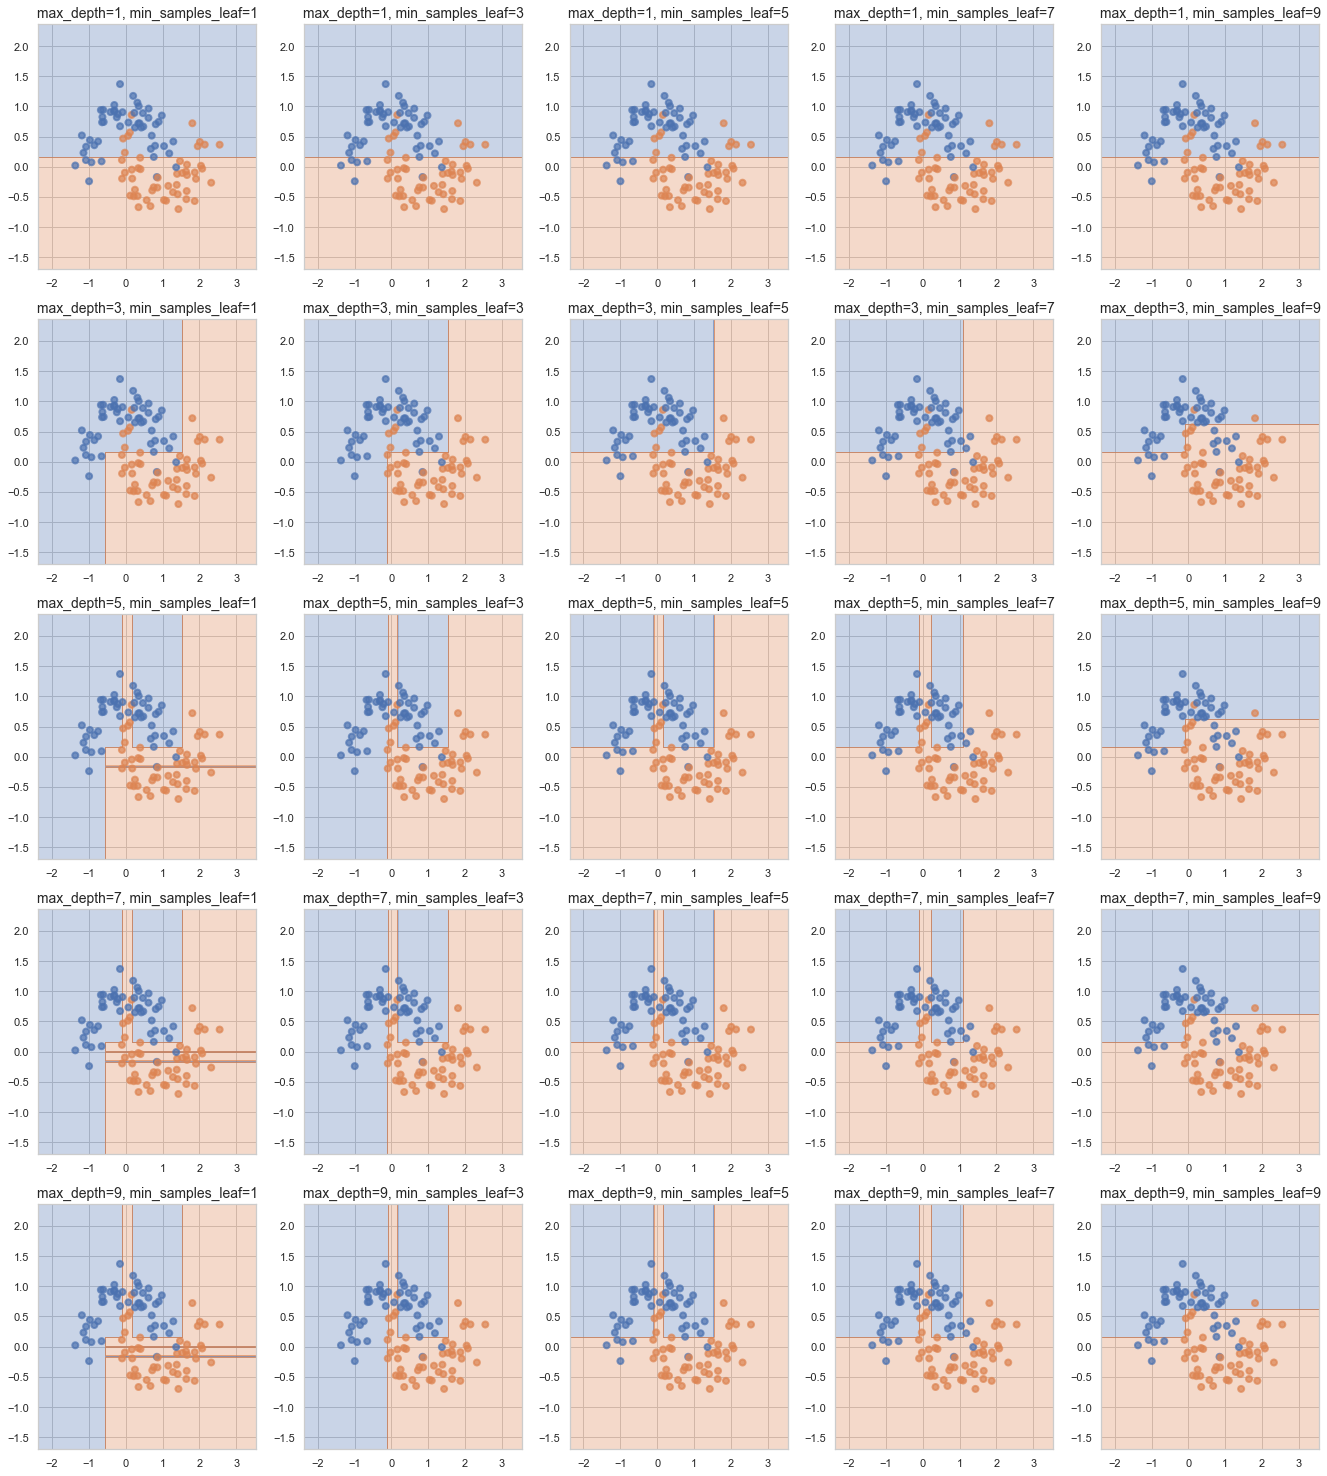

In [12]:
f, axs = plt.subplots(len(max_depth_set), len(min_samples_leaf_set), figsize=(18, 22))
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
table_df1 = pd.DataFrame(columns=['dataset', 'max_depth', 'min_samples_leaf', 'train_accur', 'test_accur'])
for i, md in enumerate(max_depth_set):
    for j, ms in enumerate(min_samples_leaf_set):        
        tree_cv = DecisionTreeClassifier(max_depth=md, min_samples_leaf=ms, random_state=42).fit(X_train, y_train)
        d = {'dataset':1, 'max_depth':md, 'min_samples_leaf':ms, 
             'train_accur':metrics.accuracy_score(tree_cv.predict(X_train), y_train), 
             'test_accur':metrics.accuracy_score(tree_cv.predict(X_valid), y_valid)}
        table_df1 = table_df.append(d, ignore_index=True)
        axs[i,j].set_title('max_depth=%d, min_samples_leaf=%d'%(md, ms), fontsize=14)
        plot_surface_mod(tree_cv, X, y, axs[i, j])
        
f.subplots_adjust(left=0.01, right=0.998, bottom=0.05, top=0.95, hspace=0.2, wspace=0.22)

In [13]:
table_df1

,dataset,max_depth,min_samples_leaf,train_accur,test_accur
0,1.0,1.0,1.0,0.7000,0.3
1,1.0,1.0,3.0,0.7000,0.3
2,1.0,1.0,5.0,0.7000,0.3
3,1.0,1.0,7.0,0.7000,0.3
4,1.0,1.0,9.0,0.7000,0.3
5,1.0,3.0,1.0,0.8750,0.7
6,1.0,3.0,3.0,0.8750,0.7
7,1.0,3.0,5.0,0.8625,0.7
8,1.0,3.0,7.0,0.8375,0.7
9,1.0,3.0,9.0,0.8250,0.7


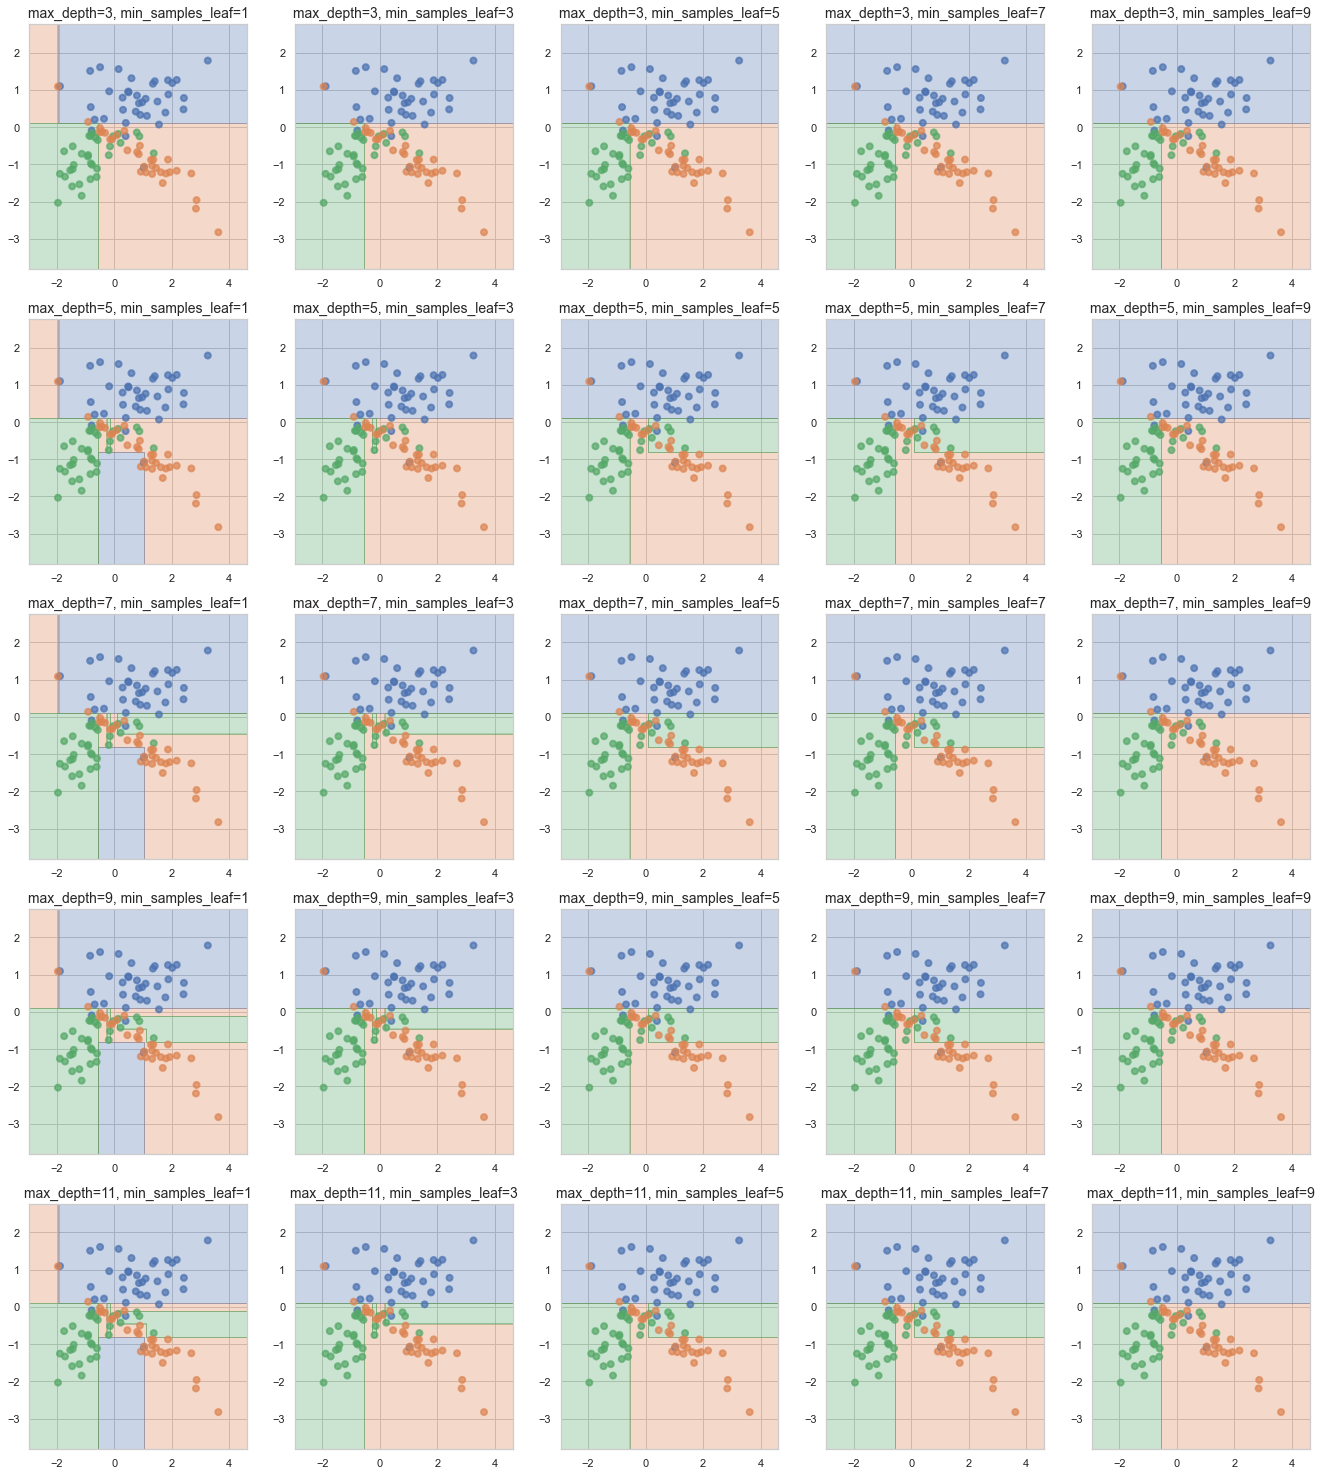

In [14]:
max_depth_set1 = np.arange(3, 12, 2)
min_samples_leaf_set1 = np.arange(1, 10, 2)

f, axs = plt.subplots(len(max_depth_set1), len(min_samples_leaf_set1), figsize=(18, 22))
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
table_df2 = pd.DataFrame(columns=['dataset', 'max_depth', 'min_samples_leaf', 'train_accur', 'test_accur'])
for i, md in enumerate(max_depth_set1):
    for j, ms in enumerate(min_samples_leaf_set1):        
        tree_cv = DecisionTreeClassifier(max_depth=md, min_samples_leaf=ms, random_state=42).fit(X_train, y_train)
        d = {'dataset':1, 'max_depth':md, 'min_samples_leaf':ms, 
             'train_accur':metrics.accuracy_score(tree_cv.predict(X_train), y_train), 
             'test_accur':metrics.accuracy_score(tree_cv.predict(X_valid), y_valid)}
        table_df2 = table_df.append(d, ignore_index=True)
        axs[i,j].set_title('max_depth=%d, min_samples_leaf=%d'%(md, ms), fontsize=14)
        plot_surface_mod(tree_cv, X, y, axs[i, j])
        
f.subplots_adjust(left=0.01, right=0.998, bottom=0.05, top=0.95, hspace=0.2, wspace=0.22)

In [15]:
table_df2

,dataset,max_depth,min_samples_leaf,train_accur,test_accur
0,1.0,1.0,1.0,0.7000,0.3
1,1.0,1.0,3.0,0.7000,0.3
2,1.0,1.0,5.0,0.7000,0.3
3,1.0,1.0,7.0,0.7000,0.3
4,1.0,1.0,9.0,0.7000,0.3
5,1.0,3.0,1.0,0.8750,0.7
6,1.0,3.0,3.0,0.8750,0.7
7,1.0,3.0,5.0,0.8625,0.7
8,1.0,3.0,7.0,0.8375,0.7
9,1.0,3.0,9.0,0.8250,0.7


__Ответ:__  Значительное увеличение глубины, очевидно, способствует переобучению дерева. Минимальное кол-во объектов влияет (позволяет повысить) обобщающую способность

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

**Ссылка на контест**: https://contest.yandex.ru/contest/31332/run-report/58970189/  
**Никнейм: dima.zhernokleev**

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [16]:
%load_ext autoreload
import hw5code
df = pd.read_csv('students.csv', sep=',')
df.rename(columns={' UNS': 'UNS'}, inplace=True)
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [17]:
feat_col = df.columns[:-1]
targ_col = 'UNS'
thres_lst = []
gini_lst = []
for col in feat_col:
    thresholds, ginis, threshold_best, gini_best = hw5code.find_best_split(np.array(df[col]), np.array(df[targ_col]))  
    thres_lst.append(thresholds)
    gini_lst.append(ginis)

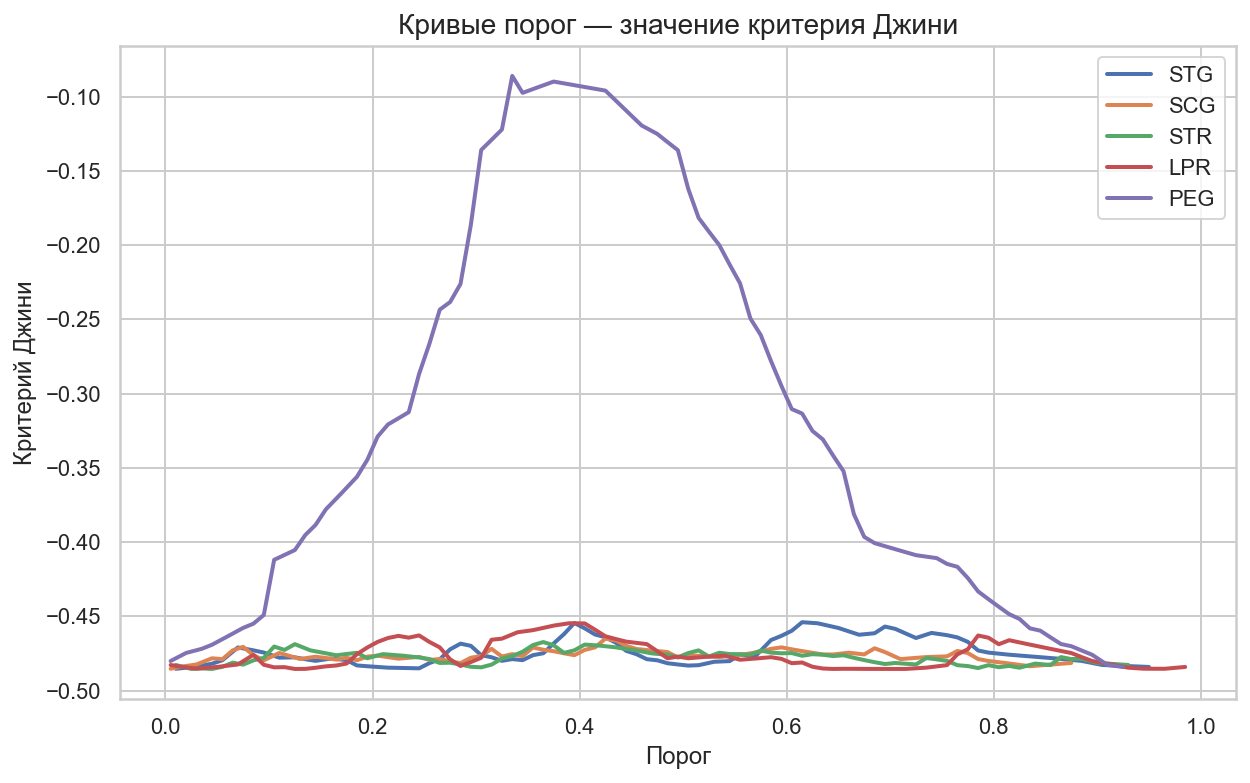

In [18]:
%config InlineBackend.figure_format = 'retina'
f = plt.figure(figsize=(10,6))
for i in range(len(thres_lst)):
    plt.plot(thres_lst[i], gini_lst[i], linewidth=2, label=feat_col[i])
plt.xlabel('Порог', fontsize=12)
plt.ylabel('Критерий Джини', fontsize=12)
plt.title('Кривые порог — значение критерия Джини', fontsize=14)
plt.legend(loc='upper right')
plt.show()

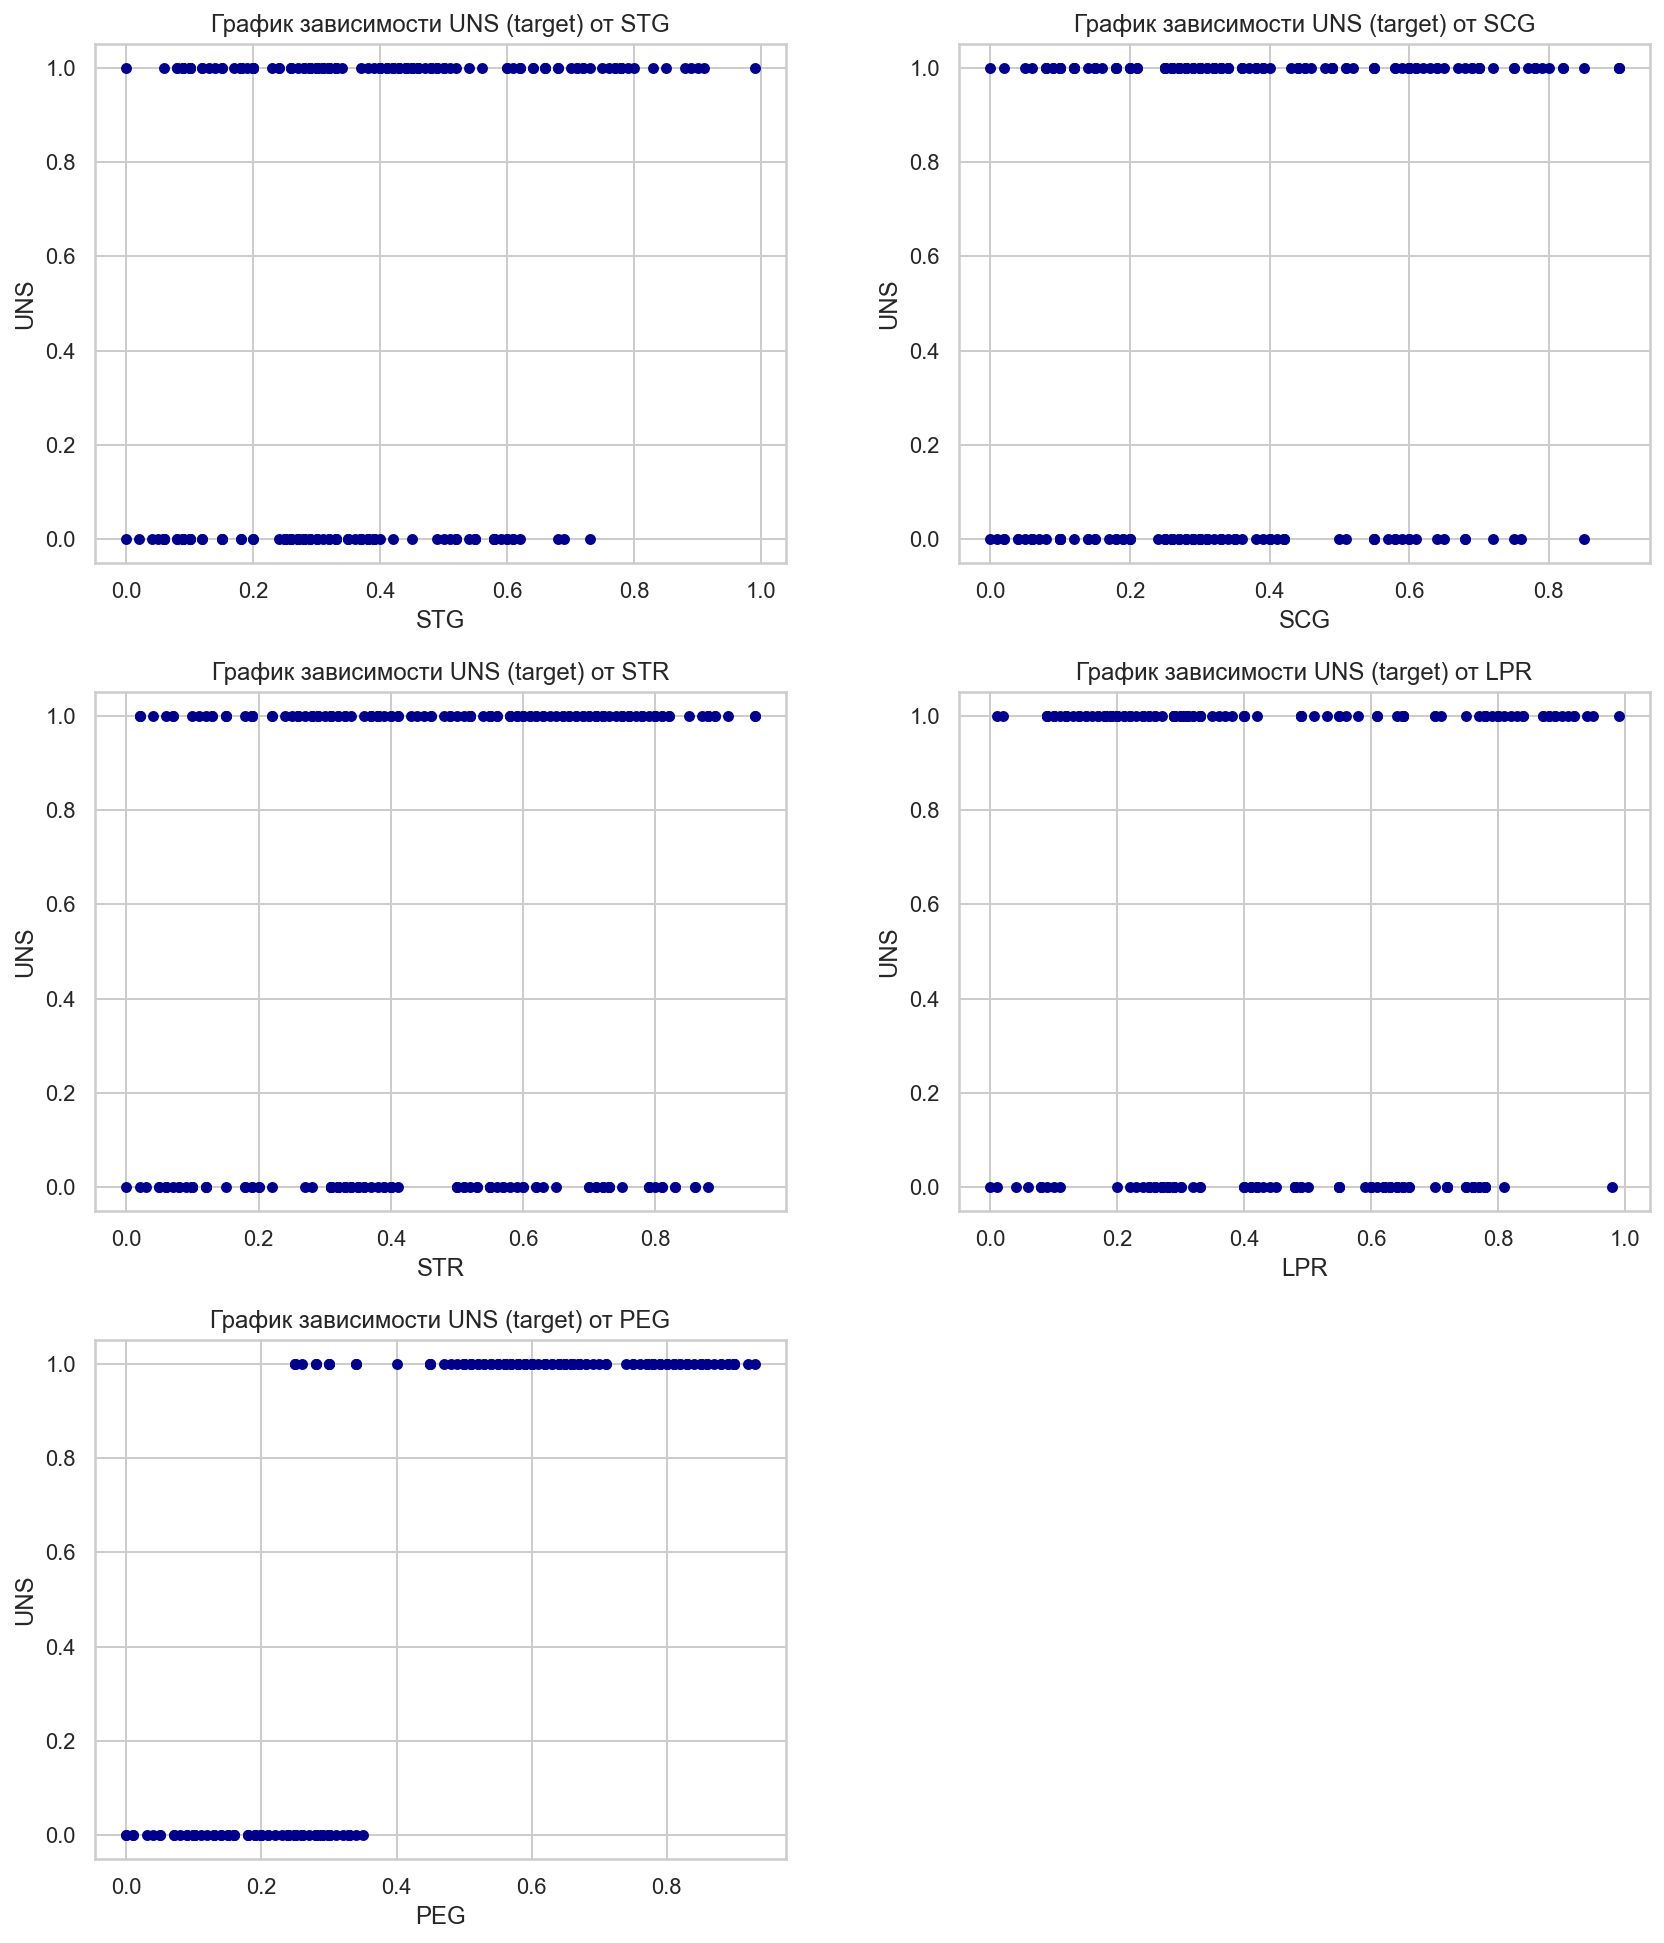

In [19]:
%config InlineBackend.figure_format = 'retina'
feat_col = df.columns[:-1]
targ_col = 'UNS'
fig, ax = plt.subplots(3, 2, figsize=(12, 14))
ax[-1, -1].axis('off')
c = 0
for i in range(3):
    for j in range(2):
        if i == 2 and j == 1:
            break
        df.plot(x=feat_col[c], y=targ_col, kind='scatter', ax=ax[i,j], rot=0, c='DarkBlue')            
        ax[i,j].set_title("График зависимости UNS (target) от %s" % feat_col[c])
        ax[i,j].set_xlabel("%s" % feat_col[c])
        ax[i,j].set_ylabel("UNS")
        c += 1
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.95,
                    hspace=0.25, wspace=0.25)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** деление стоит производить по признаку PEG. Это согласуется с визуальным анализом соответствующего графика (по графику видно, что есть порог такой, что выборка практически идеально делится по этому признаку на классы). Судя по всему, для "хороших" признаков характерно наличие пика, в отличие от признаков, по которым делить бессмысленно, для которых Джини слабо варьируется вокруг какого-то одного значения

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Ссылка на контест**: https://contest.yandex.ru/contest/31332/run-report/58970310/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
from sklearn.preprocessing import LabelEncoder
mushr_data =  pd.read_csv('agaricus-lepiota.data', sep=',')
for col in mushr_data.columns:
    le = LabelEncoder()
    mushr_data[col] = le.fit_transform(mushr_data[col])
print(mushr_data)

      p  x  s  n  t  p.1  f  c  n.1   k  ...  s.2  w  w.1  p.2  w.2  o  p.3  \
0     0  5  2  9  1    0  1  0    0   4  ...    2  7    7    0    2  1    4   
1     0  0  2  8  1    3  1  0    0   5  ...    2  7    7    0    2  1    4   
2     1  5  3  8  1    6  1  0    1   5  ...    2  7    7    0    2  1    4   
3     0  5  2  3  0    5  1  1    0   4  ...    2  7    7    0    2  1    0   
4     0  5  3  9  1    0  1  0    0   5  ...    2  7    7    0    2  1    4   
...  .. .. .. .. ..  ... .. ..  ...  ..  ...  ... ..  ...  ...  ... ..  ...   
8118  0  3  2  4  0    5  0  0    0  11  ...    2  5    5    0    1  1    4   
8119  0  5  2  4  0    5  0  0    0  11  ...    2  5    5    0    0  1    4   
8120  0  2  2  4  0    5  0  0    0   5  ...    2  5    5    0    1  1    4   
8121  1  3  3  4  0    8  1  0    1   0  ...    1  7    7    0    2  1    0   
8122  0  5  2  4  0    5  0  0    0  11  ...    2  5    5    0    1  1    4   

      k.1  s.3  u  
0       3    2  1  
1       3  

In [21]:
%autoreload 2
from hw5code import DecisionTree

X_mush = mushr_data.drop('p', axis=1).to_numpy()
y_mush = mushr_data['p'].to_numpy()
X_mush_train, X_mush_test, y_mush_train, y_mush_test = train_test_split(X_mush, y_mush, test_size=0.5, random_state=42)

cus_tree = DecisionTree(feature_types=['categorical'] * X_mush_train.shape[1])
cus_tree.fit(X_mush_train, y_mush_train)
y_pred = cus_tree.predict(X_mush_test)
print('Accuracy на тестовой =', metrics.accuracy_score(y_mush_test, y_pred))

Accuracy на тестовой = 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
ttt_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
display(ttt_data.head())

car_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
display(car_data.head())

nurs_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
display(nurs_data.head())

for data in [ttt_data, car_data, nurs_data]:
    for col in data.columns:
        if col == 'unacc':
            data[col] = data[col].apply(lambda x: 0 if x in ['unacc', 'acc'] else 1)
            continue
        if col == 'recommend':
            data[col] = data[col].apply(lambda x: 0 if x in ['not_recom', 'recommend'] else 1)
            continue            
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    display(data.head())
    
res_df = pd.DataFrame(columns=['DecisionTree_real', 'DecisionTree_categ', 'DecisionTree_real_ohe', 'DecisionTreeClassifier'],
                     index = ['mushr_data', 'ttt_data', 'car_data', 'nurs_data'])

X_ttt = ttt_data.drop('positive', axis=1).to_numpy()
y_ttt = ttt_data['positive'].to_numpy()

X_car = car_data.drop('unacc', axis=1).to_numpy()
y_car = car_data['unacc'].to_numpy()

X_nurs = nurs_data.drop('recommend', axis=1).to_numpy()
y_nurs = nurs_data['recommend'].to_numpy()

cv_splt_lst = [(X_mush, y_mush), (X_ttt, y_ttt), (X_car, y_car), (X_nurs, y_nurs)]

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2,0
3,2,3,0,0,0,0,2,1,1
4,2,3,0,0,0,0,2,0,0


In [23]:
for i, xy_set in enumerate(cv_splt_lst):
    X = xy_set[0]
    y = xy_set[1]
    dt_real = DecisionTree(feature_types=['real'] * X.shape[1])
    cv_scores = cross_val_score(dt_real, X, y, cv=10, scoring=make_scorer(metrics.accuracy_score))
    cv_mean_res = np.mean(cv_scores)
    res_df.loc[res_df.index[i], 'DecisionTree_real'] = cv_mean_res 

In [24]:
for i, xy_set in enumerate(cv_splt_lst):
    X = xy_set[0]
    y = xy_set[1]
    dt_categ = DecisionTree(feature_types=['categorical'] * X.shape[1])
    cv_scores = cross_val_score(dt_categ, X, y, cv=10, scoring=make_scorer(metrics.accuracy_score))
    cv_mean_res = np.mean(cv_scores)
    res_df.loc[res_df.index[i], 'DecisionTree_categ'] = cv_mean_res 

In [25]:
for i, xy_set in enumerate(cv_splt_lst):
    X = xy_set[0]
    y = xy_set[1]
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    X_ohe = ohe.fit_transform(X)
    dt_ohe = DecisionTree(feature_types=['real'] * X_ohe.shape[1])
    cv_scores = cross_val_score(dt_ohe, X_ohe, y, cv=10, scoring=make_scorer(metrics.accuracy_score))
    cv_mean_res = np.mean(cv_scores)
    res_df.loc[res_df.index[i], 'DecisionTree_real_ohe'] = cv_mean_res

In [26]:
for i, xy_set in enumerate(cv_splt_lst):
    X = xy_set[0]
    y = xy_set[1]
    tree_skl = DecisionTreeClassifier()
    cv_scores = cross_val_score(tree_skl, X, y, cv=10, scoring=make_scorer(metrics.accuracy_score))
    cv_mean_res = np.mean(cv_scores)
    res_df.loc[res_df.index[i], 'DecisionTreeClassifier'] = cv_mean_res 

In [27]:
res_df

,DecisionTree_real,DecisionTree_categ,DecisionTree_real_ohe,DecisionTreeClassifier
mushr_data,0.999261,1.0,0.999631,0.967157
ttt_data,0.462697,0.549265,0.55352,0.788191
car_data,0.9426,0.967519,0.921767,0.944371
nurs_data,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** для разных наборов данных алгоритмы ранжируются по-разному. Возможно, различие в ранжировании по качеству может объясняться тем, что в каких-то датасетах более значимые для таргета фичи, а в каких-то более "мусорные". Для датасетов mushroom, car, nursery наилучший результат достигается при рассмотрении всех признаков как категориальных, у tic-tac-toe качество растет от 1 алгоритма к последнему. Отметим, что у car, nursery признаки в основном порядковые, судя по всему, а у mushroom и tic-tac-toe - категориальные. В общем и целом хорошо показало себе кастомное дерево.

Компоненты случайности не обнаружил. 

Вставьте что угодно, описывающее ваши впечатления от этого задания:

<img src="https://clipartix.com/wp-content/uploads/2018/03/thinking-gif-2018-40.gif" style="width: 200px">
<img src="https://media.tenor.com/images/5d03925172533ac8d48599fe88f01b4e/tenor.gif" style="width: 200px">